**Note**: When I ran this notebook for the first time, VS Code helped me by installing the necessary python modules to run an interactive notebook. 

In [7]:
!pip install matplotlib pandas pyarrow statsmodels scikit-learn --quiet # you can install pandas using pip directly in a notebook by prepending ! to the command

In [2]:
import pandas as pd
ice_cream_sales_df = pd.read_csv("data/ice_cream_sales.csv")

In [3]:
ice_cream_sales_df.head()

,Date,Sales
0,2022-01-01,114.864257
1,2022-01-02,101.357517
2,2022-01-03,107.920026
3,2022-01-04,103.158295
4,2022-01-05,91.291627


In [4]:
# make the index the Date, setting the Date as a date time first
ice_cream_sales_df['Date'] = pd.to_datetime(ice_cream_sales_df['Date'])
ice_cream_sales_df.set_index('Date', inplace=True)
ice_cream_sales_df.head()

,Sales
Date,
2022-01-01,114.864257
2022-01-02,101.357517
2022-01-03,107.920026
2022-01-04,103.158295
2022-01-05,91.291627


<Axes: xlabel='Date'>

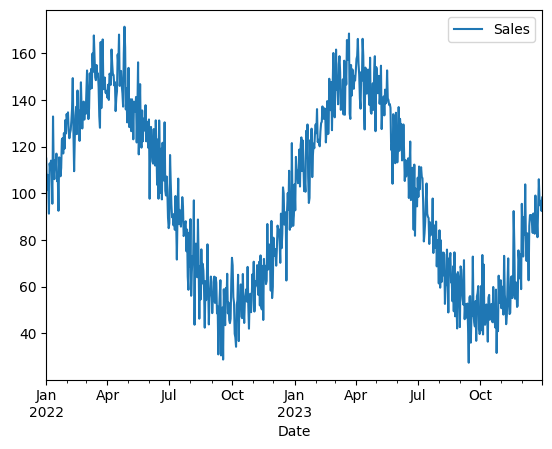

In [5]:
# create a plot of the data
ice_cream_sales_df.plot()

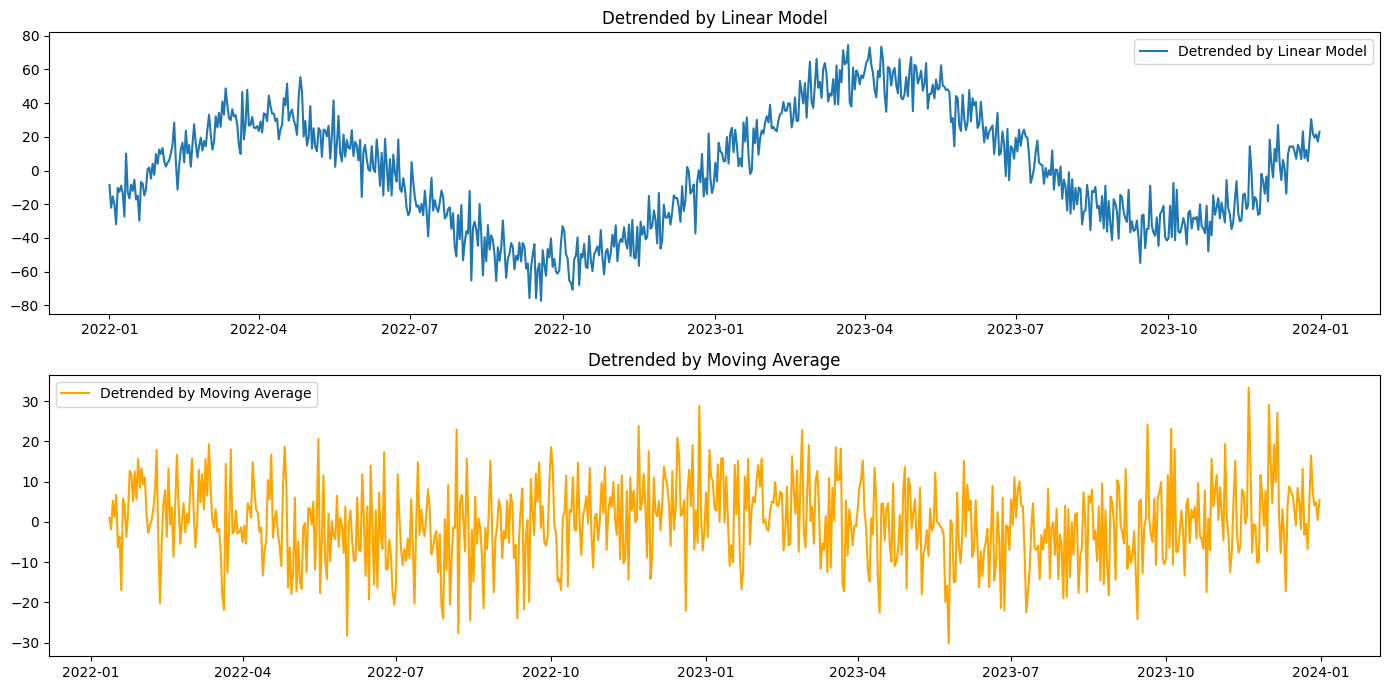

In [8]:
import pandas as pd
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Assuming ice_cream_sales_df is your DataFrame

# Convert the index to datetime
ice_cream_sales_df.index = pd.to_datetime(ice_cream_sales_df.index)

# Linear Model Approach
# Create a time index for the linear model
time_index = np.arange(len(ice_cream_sales_df.index))

# Reshape for sklearn
X = time_index.reshape(-1, 1)
y = ice_cream_sales_df['Sales'].values

# Fit a linear model
model = LinearRegression().fit(X, y)

# Predict the trend
trend = model.predict(X)

# Detrend by subtracting the trend from the original series
detrended_linear = y - trend

# Moving Average Approach
# Calculate the rolling mean
window_size = 12  # You can adjust this depending on your dataset
rolling_mean = ice_cream_sales_df['Sales'].rolling(window=window_size).mean()

# Detrend by subtracting the moving average from the original series
detrended_ma = ice_cream_sales_df['Sales'] - rolling_mean

# Plotting
plt.figure(figsize=(14, 7))
plt.subplot(2, 1, 1)
plt.plot(ice_cream_sales_df.index, detrended_linear, label='Detrended by Linear Model')
plt.title('Detrended by Linear Model')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(ice_cream_sales_df.index, detrended_ma, label='Detrended by Moving Average', color='orange')
plt.title('Detrended by Moving Average')
plt.legend()

plt.tight_layout()
plt.show()


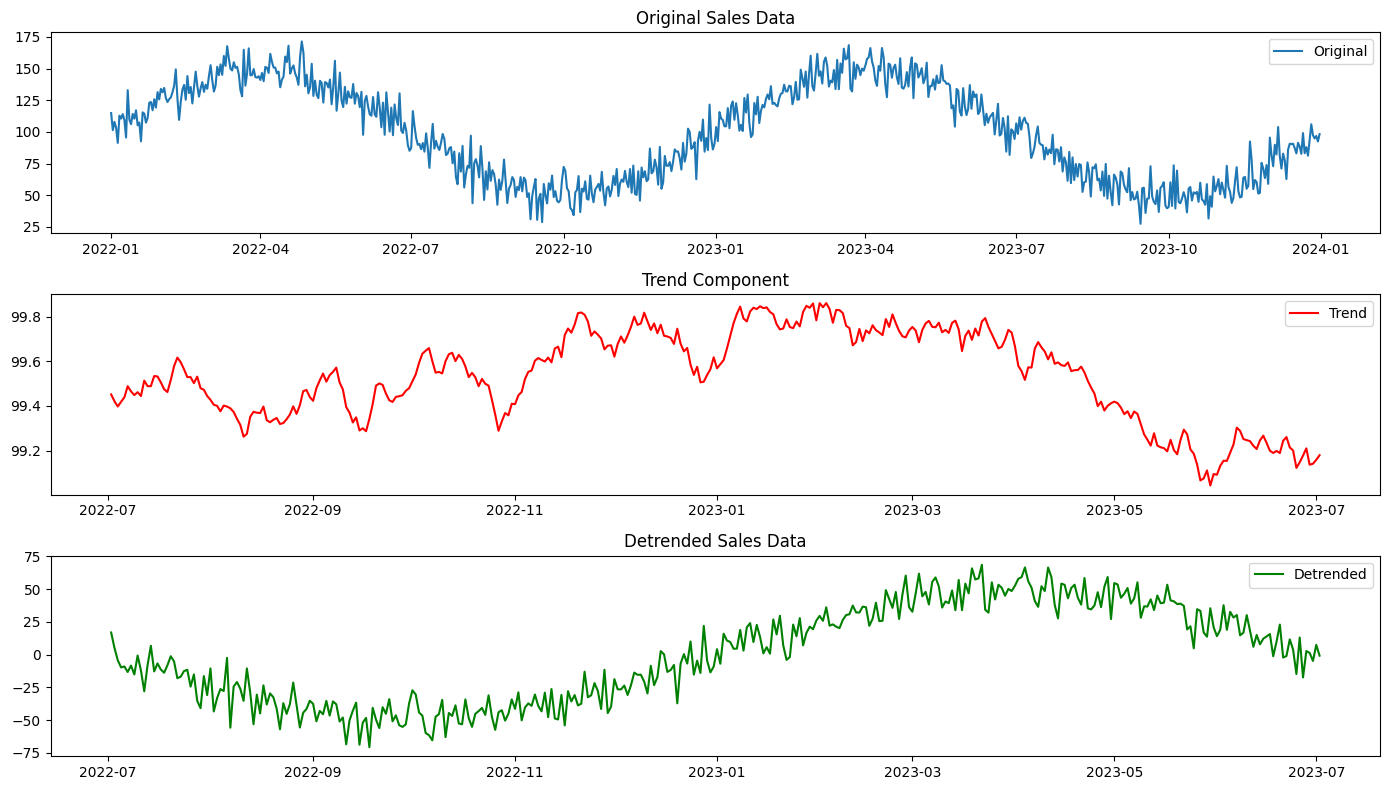

In [10]:
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

# Assuming ice_cream_sales_df is your DataFrame and it is already indexed by Date in datetime format

# Perform seasonal decomposition
# The model can be 'additive' or 'multiplicative', depending on the nature of the seasonal component
decomposition = seasonal_decompose(ice_cream_sales_df['Sales'], model='additive', period=365)

# Extract the trend component
trend = decomposition.trend

# Detrend the data by subtracting the trend from the original data
# Note: The trend will have NaNs at the beginning and end because of the moving average calculation
detrended = ice_cream_sales_df['Sales'] - trend

# Plotting the original data, the trend, and the detrended data
plt.figure(figsize=(14, 8))

plt.subplot(311)
plt.plot(ice_cream_sales_df['Sales'], label='Original')
plt.legend(loc='best')
plt.title('Original Sales Data')

plt.subplot(312)
plt.plot(trend, label='Trend', color='r')
plt.legend(loc='best')
plt.title('Trend Component')

plt.subplot(313)
plt.plot(detrended, label='Detrended', color='g')
plt.legend(loc='best')
plt.title('Detrended Sales Data')

plt.tight_layout()
plt.show()
